In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
df_glasser = pd.read_excel("/home/ishaq/Downloads/Tableurs/df_glasser360.xlsx")
df_schaeffer = pd.read_excel("/home/ishaq/Downloads/Tableurs/df_schaeffer.xlsx")
df = pd.read_excel("/home/ishaq/Downloads/Tableurs/Liste_finale_des_participants_gardés.xlsx")

In [3]:
df_glasser

,Unnamed: 0,SUBJID,Moyenne Right_V1,Mediane Right_V1,Q1 Right_V1,Q3 Right_V1,Variance Right_V1,Volume (en mm3) Right_V1,Moyenne Right_MST,Mediane Right_MST,...,Q1 Left_a32pr,Q3 Left_a32pr,Variance Left_a32pr,Volume (en mm3) Left_a32pr,Moyenne Left_p24,Mediane Left_p24,Q1 Left_p24,Q3 Left_p24,Variance Left_p24,Volume (en mm3) Left_p24
0,0,01002KAP,22.013077,26.509661,19.945336,28.695101,198.312198,10039,12.507703,0.404609,...,26.780372,30.411114,14.956735,1477,41.740493,34.252295,31.697814,41.465972,467.459830,1554
1,1,01005AGP,23.489629,27.783024,23.437912,29.376719,210.882392,10039,24.298126,32.554976,...,28.476536,35.408193,22.882760,1477,31.382315,30.758488,28.906464,33.651805,12.143966,1554
2,2,01006SCP,21.654099,26.070266,19.302206,26.929076,248.661874,10039,19.366167,21.180070,...,25.237122,27.756935,14.283607,1477,37.527201,36.720302,31.329847,42.876499,48.690505,1554
3,3,01007LAP,22.104097,25.657562,3.267502,26.612391,3695.639248,10039,17.482512,4.846737,...,26.115961,28.470082,8.041697,1477,34.797838,33.501327,30.506420,38.647891,28.641160,1554
4,4,01008LBP,21.798641,26.178830,23.258085,27.853399,128.355451,10039,21.208153,25.196097,...,28.333847,31.312996,13.961925,1477,41.033512,38.174444,30.872891,49.694748,133.045988,1554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185,19034LEP,21.107470,26.690895,23.435302,27.709985,132.134012,10039,17.911341,22.927725,...,25.684985,29.275973,10.653253,1477,30.850775,28.927175,25.851509,36.347147,31.414018,1554
186,186,19035SPP,20.625546,25.536002,22.455315,26.790932,133.056798,10039,18.553582,23.974732,...,24.634940,29.249911,150.399969,1477,48.235051,37.311900,34.145802,52.663484,639.726643,1554
187,187,19037GHP,20.938494,25.031681,21.118596,26.447750,141.582282,10039,17.208939,22.470703,...,28.590259,32.880938,12.515822,1477,33.572025,31.999132,29.052437,36.804652,38.548668,1554
188,188,19038HGP,21.520681,26.634316,21.732236,27.815862,167.273637,10039,19.497461,24.966358,...,28.763248,32.726013,14.199986,1477,34.854784,34.194047,30.680290,38.498130,34.462112,1554


In [4]:
#Ecarte les participants avec les R2 ratés 
participants_ecartes = ["15002OJP", "15003FMP", "15004CAP"]
df=df[~df["participant_id"].isin(participants_ecartes)].reset_index(drop=True)

In [5]:
#Division du dataframe principale en fonction des groupes
df_fast = df[df["Declin"] == "Fast"].reset_index(drop=True)
df_slow = df[df["Declin"] == "Slow"].reset_index(drop=True)
df_memsup = df[df["SITE_APP"] == "Membre supérieur"].reset_index(drop=True)
df_meminf = df[df["SITE_APP"] == "Membre inférieur"].reset_index(drop=True)
df_bulbaire = df[df["SITE_APP"] == "Bulbaire"].reset_index(drop=True)

In [6]:
#Création des listes pour les différents groupes
liste_fast = df_fast["participant_id"].tolist()
liste_slow = df_slow["participant_id"].tolist()
liste_memsup = df_memsup["participant_id"].tolist()
liste_meminf = df_meminf["participant_id"].tolist()
liste_bulbaire = df_bulbaire["participant_id"].tolist()

## GLASSER360

In [7]:
#Division du dataframe Glasser360 en fonction des différents groupes
df_glasser_fast = df_glasser[df_glasser["SUBJID"].isin(liste_fast)].reset_index(drop=True)
df_glasser_slow = df_glasser[df_glasser["SUBJID"].isin(liste_slow)].reset_index(drop=True)
df_glasser_memsup = df_glasser[df_glasser["SUBJID"].isin(liste_memsup)].reset_index(drop=True)
df_glasser_meminf = df_glasser[df_glasser["SUBJID"].isin(liste_meminf)].reset_index(drop=True)
df_glasser_bulbaire = df_glasser[df_glasser["SUBJID"].isin(liste_bulbaire)].reset_index(drop=True)

In [8]:
#Moyennes
df_glasser_fast_moyenne = df_glasser_fast.filter(like="Moyenne")
df_glasser_slow_moyenne = df_glasser_slow.filter(like="Moyenne")
df_glasser_memsup_moyenne = df_glasser_memsup.filter(like="Moyenne")
df_glasser_meminf_moyenne = df_glasser_meminf.filter(like="Moyenne")
df_glasser_bulbaire_moyenne = df_glasser_bulbaire.filter(like="Moyenne")
#Variances 
df_glasser_fast_variance = df_glasser_fast.filter(like="Variance")
df_glasser_slow_variance = df_glasser_slow.filter(like="Variance")
df_glasser_memsup_variance = df_glasser_memsup.filter(like="Variance")
df_glasser_meminf_variance = df_glasser_meminf.filter(like="Variance")
df_glasser_bulbaire_variance = df_glasser_bulbaire.filter(like="Variance")
#Mediane
df_glasser_fast_mediane = df_glasser_fast.filter(like="Mediane")
df_glasser_slow_mediane = df_glasser_slow.filter(like="Mediane")
df_glasser_memsup_mediane = df_glasser_memsup.filter(like="Mediane")
df_glasser_meminf_mediane = df_glasser_meminf.filter(like="Mediane")
df_glasser_bulbaire_mediane = df_glasser_bulbaire.filter(like="Mediane")

### Test Fast/Slow

In [9]:
test_t_positif = []
mannwithney = []

for i in df_glasser_fast_moyenne:
    t_stat, p_val = ttest_ind(df_glasser_fast_moyenne[i], df_glasser_slow_moyenne[i])
    u_stat, p_value = mannwhitneyu(df_glasser_fast_moyenne[i], df_glasser_slow_moyenne[i])
    
    #Test t
    print(f"{i} :\nT_stat: {t_stat}\nP-value: {p_val}")
    if p_val < 0.05 : 
        print("Différence significative")
        print(type(test_t_positif))
        test_t_positif.append(str(i))
    print("")
    
    #Test Mann-Withney 
    print(f"{i} :\nU_stat: {u_stat}\nP-value: {p_value}")
    if p_value < 0.05 : 
        print("Différence significative")
        mannwithney.append(str(i))
    print("")
    

Moyenne Right_V1 :
T_stat: 0.5316859236505421
P-value: 0.5956102044671434

Moyenne Right_V1 :
U_stat: 4807.0
P-value: 0.019735272745367058
Différence significative

Moyenne Right_MST :
T_stat: 2.3399059416658408
P-value: 0.020403784991239387
Différence significative
<class 'list'>

Moyenne Right_MST :
U_stat: 4740.0
P-value: 0.032523959185623785
Différence significative

Moyenne Right_V6 :
T_stat: -0.11312741991920926
P-value: 0.9100577421119651

Moyenne Right_V6 :
U_stat: 4574.0
P-value: 0.09718714830208271

Moyenne Right_V2 :
T_stat: -0.9386405497740083
P-value: 0.34919441702931997

Moyenne Right_V2 :
U_stat: 4026.0
P-value: 0.9390145718044954

Moyenne Right_V3 :
T_stat: 0.7318967694651497
P-value: 0.4651995280035096

Moyenne Right_V3 :
U_stat: 4345.0
P-value: 0.31852319099841153

Moyenne Right_V4 :
T_stat: 1.0087541208165072
P-value: 0.31446958906465455

Moyenne Right_V4 :
U_stat: 4064.0
P-value: 0.8522732281170533

Moyenne Right_V8 :
T_stat: -0.6349917545202766
P-value: 0.526253778

In [10]:
print(test_t_positif)
print(len(test_t_positif))
print("")
print(mannwithney)
print(len(mannwithney))

['Moyenne Right_MST', 'Moyenne Right_31pv', 'Moyenne Right_TE2p', 'Moyenne Right_31pd', 'Moyenne Left_LIPv', 'Moyenne Left_LIPd']
6

['Moyenne Right_V1', 'Moyenne Right_MST', 'Moyenne Right_d23ab', 'Moyenne Right_OP4', 'Moyenne Right_FOP3', 'Moyenne Right_PBelt', 'Moyenne Right_STSdp', 'Moyenne Right_TE1a', 'Moyenne Right_TE2p', 'Moyenne Left_PCV', 'Moyenne Left_LIPv', 'Moyenne Left_1', 'Moyenne Left_47s', 'Moyenne Left_LIPd']
14


### Membre supérieur / Bulbaire 

In [11]:
test_t_positif = []
mannwithney = []

for i in df_glasser_memsup_moyenne :
    t_stat, p_val = ttest_ind(df_glasser_memsup_moyenne[i], df_glasser_bulbaire_moyenne[i])
    u_stat, p_value = mannwhitneyu(df_glasser_memsup_moyenne[i], df_glasser_bulbaire_moyenne[i])
    
    #Test t
    print(f"{i} :\nT_stat: {t_stat}\nP-value: {p_val}")
    if p_val < 0.05 : 
        print("Différence significative")
        print(type(test_t_positif))
        test_t_positif.append(str(i))
    print("")
    
    #Test Mann-Withney 
    print(f"{i} :\nU_stat: {u_stat}\nP-value: {p_value}")
    if p_value < 0.05 : 
        print("Différence significative")
        mannwithney.append(str(i))
    print("")
    

Moyenne Right_V1 :
T_stat: 0.3117924518015068
P-value: 0.7557438726968279

Moyenne Right_V1 :
U_stat: 1744.0
P-value: 0.7896901337218262

Moyenne Right_MST :
T_stat: 0.2784193824851652
P-value: 0.7811736520600688

Moyenne Right_MST :
U_stat: 1681.5
P-value: 0.9484464555085845

Moyenne Right_V6 :
T_stat: 0.6394813980174577
P-value: 0.5237389489681161

Moyenne Right_V6 :
U_stat: 1896.0
P-value: 0.27760707232398407

Moyenne Right_V2 :
T_stat: 0.7293738402700863
P-value: 0.4672061986437199

Moyenne Right_V2 :
U_stat: 1822.0
P-value: 0.4920902499840887

Moyenne Right_V3 :
T_stat: 0.3846631641010811
P-value: 0.7011735733219538

Moyenne Right_V3 :
U_stat: 1919.0
P-value: 0.2264179041157378

Moyenne Right_V4 :
T_stat: -1.3505917415241644
P-value: 0.17938901910630883

Moyenne Right_V4 :
U_stat: 1594.0
P-value: 0.5918755513857923

Moyenne Right_V8 :
T_stat: 1.0936205722605465
P-value: 0.2763302521039102

Moyenne Right_V8 :
U_stat: 1867.0
P-value: 0.3526536260170311

Moyenne Right_4 :
T_stat: 2.9

In [12]:
print(test_t_positif)
print(len(test_t_positif))
print("")
print(mannwithney)
print(len(mannwithney))

['Moyenne Right_4', 'Moyenne Right_3b', 'Moyenne Right_POS2', 'Moyenne Right_5m', 'Moyenne Right_5mv', 'Moyenne Right_23c', 'Moyenne Right_5L', 'Moyenne Right_24dd', 'Moyenne Right_2', 'Moyenne Right_3a', 'Moyenne Right_6d', 'Moyenne Right_6mp', 'Moyenne Right_IFSa', 'Moyenne Right_a9-46v', 'Moyenne Right_6a', 'Moyenne Right_s6-8', 'Moyenne Right_43', 'Moyenne Right_PFt', 'Moyenne Right_STGa', 'Moyenne Right_FOP5', 'Moyenne Left_V6', 'Moyenne Left_4', 'Moyenne Left_A1', 'Moyenne Left_5m', 'Moyenne Left_LIPv', 'Moyenne Left_1', 'Moyenne Left_9a', 'Moyenne Left_a10p', 'Moyenne Left_PoI2', 'Moyenne Left_STSdp', 'Moyenne Left_STSvp', 'Moyenne Left_IP2', 'Moyenne Left_IP0', 'Moyenne Left_V4t', 'Moyenne Left_LO3', 'Moyenne Left_STSva']
36

['Moyenne Right_4', 'Moyenne Right_3b', 'Moyenne Right_5m', 'Moyenne Right_5mv', 'Moyenne Right_23c', 'Moyenne Right_5L', 'Moyenne Right_24dd', 'Moyenne Right_SCEF', 'Moyenne Right_6ma', 'Moyenne Right_2', 'Moyenne Right_3a', 'Moyenne Right_6d', 'Moyenne R

### Test Membre supérieur / Membre inférieur

In [13]:
test_t_positif = []
mannwithney = []

for i in df_glasser_memsup_moyenne :
    t_stat, p_val = ttest_ind(df_glasser_memsup_moyenne[i], df_glasser_meminf_moyenne[i])
    u_stat, p_value = mannwhitneyu(df_glasser_memsup_moyenne[i], df_glasser_meminf_moyenne[i])
    
    #Test t
    print(f"{i} :\nT_stat: {t_stat}\nP-value: {p_val}")
    if p_val < 0.05 : 
        print("Différence significative")
        print(type(test_t_positif))
        test_t_positif.append(str(i))
    print("")
    
    #Test Mann-Withney 
    print(f"{i} :\nT_stat: {u_stat}\nP-value: {p_value}")
    if p_value < 0.05 : 
        print("Différence significative")
        mannwithney.append(str(i))
    print("")
    

Moyenne Right_V1 :
T_stat: -1.819355841530756
P-value: 0.07097867442516792

Moyenne Right_V1 :
T_stat: 2229.0
P-value: 0.20716762270333589

Moyenne Right_MST :
T_stat: -0.3823927749044247
P-value: 0.7027458217588831

Moyenne Right_MST :
T_stat: 2509.5
P-value: 0.9001024530411115

Moyenne Right_V6 :
T_stat: -0.9093830178418074
P-value: 0.36469981564676135

Moyenne Right_V6 :
T_stat: 2507.0
P-value: 0.892093764784859

Moyenne Right_V2 :
T_stat: -2.6932226033142856
P-value: 0.007934902486485691
Différence significative
<class 'list'>

Moyenne Right_V2 :
T_stat: 1984.0
P-value: 0.024227754168703514
Différence significative

Moyenne Right_V3 :
T_stat: -1.0580346512514927
P-value: 0.291848902337039

Moyenne Right_V3 :
T_stat: 2511.0
P-value: 0.9049127692817643

Moyenne Right_V4 :
T_stat: -1.059235929920116
P-value: 0.29130352393347153

Moyenne Right_V4 :
T_stat: 2199.0
P-value: 0.16670336385015894

Moyenne Right_V8 :
T_stat: 0.9221347758878136
P-value: 0.3580334582695027

Moyenne Right_V8 :


In [14]:
print(test_t_positif)
print(len(test_t_positif))
print("")
print(mannwithney)
print(len(mannwithney))

['Moyenne Right_V2', 'Moyenne Left_STGa']
2

['Moyenne Right_V2', 'Moyenne Right_24dd', 'Moyenne Right_a24pr', 'Moyenne Right_13l', 'Moyenne Right_FOP1', 'Moyenne Right_A4', 'Moyenne Left_LIPv', 'Moyenne Left_44', 'Moyenne Left_STGa', 'Moyenne Left_DVT']
10


### Test Membre inférieur / Bulbaire

In [15]:
test_t_positif = []
mannwithney = []

for i in df_glasser_meminf_moyenne :
    t_stat, p_val = ttest_ind(df_glasser_meminf_moyenne[i], df_glasser_bulbaire_moyenne[i])
    u_stat, p_value = mannwhitneyu(df_glasser_meminf_moyenne[i], df_glasser_bulbaire_moyenne[i])
    
    #Test t
    print(f"{i} :\nT_stat: {t_stat}\nP-value: {p_val}")
    if p_val < 0.05 : 
        print("Différence significative")
        print(type(test_t_positif))
        test_t_positif.append(str(i))
    print("")
    
    #Test Mann-Withney 
    print(f"{i} :\nT_stat: {u_stat}\nP-value: {p_value}")
    if p_value < 0.05 : 
        print("Différence significative")
        mannwithney.append(str(i))
    print("")
    

Moyenne Right_V1 :
T_stat: 1.5100280242216149
P-value: 0.13395651060656683

Moyenne Right_V1 :
T_stat: 1670.0
P-value: 0.1844893108216299

Moyenne Right_MST :
T_stat: 0.5669925939640753
P-value: 0.5718957831452214

Moyenne Right_MST :
T_stat: 1445.5
P-value: 0.9707970906070434

Moyenne Right_V6 :
T_stat: 0.9374150735746759
P-value: 0.3506366781316014

Moyenne Right_V6 :
T_stat: 1631.0
P-value: 0.2761083634726814

Moyenne Right_V2 :
T_stat: 2.7384935286338563
P-value: 0.007221095509930632
Différence significative
<class 'list'>

Moyenne Right_V2 :
T_stat: 1876.0
P-value: 0.009767572327250132
Différence significative

Moyenne Right_V3 :
T_stat: 1.0999592230188504
P-value: 0.27379566298386754

Moyenne Right_V3 :
T_stat: 1642.0
P-value: 0.2475916552846127

Moyenne Right_V4 :
T_stat: -1.1514174436293962
P-value: 0.2521032116063482

Moyenne Right_V4 :
T_stat: 1626.0
P-value: 0.2897837448465128

Moyenne Right_V8 :
T_stat: 1.2494208946410688
P-value: 0.21421218200113754

Moyenne Right_V8 :
T_s

In [16]:
print(test_t_positif)
print(len(test_t_positif))
print("")
print(mannwithney)
print(len(mannwithney))

['Moyenne Right_V2', 'Moyenne Right_STGa', 'Moyenne Right_A5', 'Moyenne Right_V6A', 'Moyenne Left_V4', 'Moyenne Left_a10p', 'Moyenne Left_13l', 'Moyenne Left_25', 'Moyenne Left_s32', 'Moyenne Left_STSva']
10

['Moyenne Right_V2', 'Moyenne Right_4', 'Moyenne Right_3b', 'Moyenne Right_55b', 'Moyenne Right_5L', 'Moyenne Right_6ma', 'Moyenne Right_LIPv', 'Moyenne Right_2', 'Moyenne Right_6d', 'Moyenne Right_6mp', 'Moyenne Right_p32pr', 'Moyenne Right_8Av', 'Moyenne Right_8Ad', 'Moyenne Right_44', 'Moyenne Right_47s', 'Moyenne Right_6a', 'Moyenne Right_i6-8', 'Moyenne Right_s6-8', 'Moyenne Right_43', 'Moyenne Right_PoI2', 'Moyenne Right_TA2', 'Moyenne Right_AVI', 'Moyenne Right_FOP1', 'Moyenne Right_PeEc', 'Moyenne Right_STGa', 'Moyenne Right_A5', 'Moyenne Right_STSdp', 'Moyenne Right_25', 'Moyenne Left_V2', 'Moyenne Left_V4', 'Moyenne Left_A1', 'Moyenne Left_5m', 'Moyenne Left_7Am', 'Moyenne Left_a10p', 'Moyenne Left_OP1', 'Moyenne Left_OP2-3', 'Moyenne Left_PFcm', 'Moyenne Left_PoI2', 'Mo

## SCHAEFER

In [17]:
df_schaeffer_fast = df_schaeffer[df_schaeffer["SUBJID"].isin(liste_fast)].reset_index(drop=True)
df_schaeffer_slow = df_schaeffer[df_schaeffer["SUBJID"].isin(liste_slow)].reset_index(drop=True)
df_schaeffer_memsup = df_schaeffer[df_schaeffer["SUBJID"].isin(liste_memsup)].reset_index(drop=True)
df_schaeffer_meminf = df_schaeffer[df_schaeffer["SUBJID"].isin(liste_meminf)].reset_index(drop=True)
df_schaeffer_bulbaire = df_schaeffer[df_schaeffer["SUBJID"].isin(liste_bulbaire)].reset_index(drop=True)

In [18]:
#Moyennes 
df_schaeffer_fast_moyenne = df_schaeffer_fast.filter(like="Moyenne")
df_schaeffer_slow_moyenne = df_schaeffer_slow.filter(like="Moyenne")
df_schaeffer_memsup_moyenne = df_schaeffer_memsup.filter(like="Moyenne")
df_schaeffer_meminf_moyenne = df_schaeffer_meminf.filter(like="Moyenne")
df_schaeffer_bulbaire_moyenne = df_schaeffer_bulbaire.filter(like="Moyenne")
#Variances 
df_schaeffer_fast_variance = df_schaeffer_fast.filter(like="Variance")
df_schaeffer_slow_variance = df_schaeffer_slow.filter(like="Variance")
df_schaeffer_memsup_variance = df_schaeffer_memsup.filter(like="Variance")
df_schaeffer_meminf_variance = df_schaeffer_meminf.filter(like="Variance")
df_schaeffer_bulbaire_variance = df_schaeffer_bulbaire.filter(like="Variance")
#Medianes 
df_schaeffer_fast_mediane = df_schaeffer_fast.filter(like="Mediane")
df_schaeffer_slow_mediane = df_schaeffer_slow.filter(like="Mediane")
df_schaeffer_memsup_mediane = df_schaeffer_memsup.filter(like="Mediane")
df_schaeffer_meminf_mediane = df_schaeffer_meminf.filter(like="Mediane")
df_schaeffer_bulbaire_mediane = df_schaeffer_bulbaire.filter(like="Mediane")

### Membre supérieur/Bulbaire

In [19]:
test_t_positif = []
mannwithney = []

for i in df_schaeffer_fast_moyenne : 
    t_stat, p_val = ttest_ind(df_schaeffer_fast_moyenne[i],df_schaeffer_slow_moyenne[i])
    u_stat, p_value = mannwhitneyu(df_schaeffer_fast_moyenne[i], df_schaeffer_slow_moyenne[i])
    
    print(f"{i} :\nT_stat : {t_stat}\nP-value: {p_val}")
    if p_val < 0.05 : 
        print("Différence significative")
        test_t_positif.append(str(i))
    print("")
    
    print(f"{i} :\nT_stat: {u_stat}\nP-value : {p_value}")
    if p_value < 0.05 : 
        print("Différence significative")
        mannwithney.append(str(i))
    print("")
    

Moyenne Left_VisCent_ExStr_1 :
T_stat : -0.5676177355831942
P-value: 0.571013823726396

Moyenne Left_VisCent_ExStr_1 :
T_stat: 4350.0
P-value : 0.31157016302726404

Moyenne Left_VisCent_ExStr_2 :
T_stat : -0.574448359275587
P-value: 0.5663937934792576

Moyenne Left_VisCent_ExStr_2 :
T_stat: 4236.0
P-value : 0.49473193482102773

Moyenne Left_VisCent_ExStr_3 :
T_stat : -0.8444347612686873
P-value: 0.3995664030836342

Moyenne Left_VisCent_ExStr_3 :
T_stat: 4132.0
P-value : 0.7020591044776558

Moyenne Left_VisCent_ExStr_4 :
T_stat : -0.8776479129385601
P-value: 0.381324545171139

Moyenne Left_VisCent_ExStr_4 :
T_stat: 4180.0
P-value : 0.6022805584366792

Moyenne Left_VisCent_ExStr_5 :
T_stat : -1.2564204454268644
P-value: 0.2106192701673547

Moyenne Left_VisCent_ExStr_5 :
T_stat: 3611.0
P-value : 0.2632442475443235

Moyenne Left_VisCent_ExStr_6 :
T_stat : 0.31295437898377826
P-value: 0.7546837620131543

Moyenne Left_VisCent_ExStr_6 :
T_stat: 4156.0
P-value : 0.6513892452092778

Moyenne Lef

In [20]:
print(test_t_positif)
print(len(test_t_positif))
print("")
print(mannwithney)
print(len(mannwithney))

['Moyenne Left_DorsAttnB_PostC_6', 'Moyenne Left_DefaultB_Temp_5', 'Moyenne Left_TempPar_2', 'Moyenne Right_ContA_PFCl_1', 'Moyenne Right_TempPar_9']
5

['Moyenne Left_SomMotA_6', 'Moyenne Left_SomMotB_Aud_3', 'Moyenne Left_DorsAttnB_PostC_6', 'Moyenne Left_DefaultA_PFCm_6', 'Moyenne Right_SomMotA_5', 'Moyenne Right_SomMotA_14', 'Moyenne Right_SomMotB_S2_1', 'Moyenne Right_SalVentAttnB_PFCl_3', 'Moyenne Right_ContA_PFCl_1', 'Moyenne Right_DefaultA_PFCm_1', 'Moyenne Right_DefaultA_PFCm_5', 'Moyenne Right_TempPar_7', 'Moyenne Right_TempPar_10']
13


### Membre supérieur/Bulbaire

In [21]:
test_t_positif = []
mannwithney = []

for i in df_schaeffer_memsup_moyenne : 
    t_stat, p_val = ttest_ind(df_schaeffer_memsup_moyenne[i],df_schaeffer_bulbaire_moyenne[i])
    u_stat, p_value = mannwhitneyu(df_schaeffer_memsup_moyenne[i], df_schaeffer_bulbaire_moyenne[i])
    
    print(f"{i} :\nT_stat: {t_stat}\nP-value: {p_val}")
    if p_val < 0.05 : 
        print("Différence significative")
        test_t_positif.append(str(i))
    print("")
    
    print(f"{i} : \nT_stat: {u_stat}\nP-value: {p_value}")
    if p_value < 0.05 : 
        print("Différence signiticative")
        mannwithney.append(str(i))
    print("")

Moyenne Left_VisCent_ExStr_1 :
T_stat: 0.8344783473751056
P-value: 0.40568355925698485

Moyenne Left_VisCent_ExStr_1 : 
T_stat: 1846.0
P-value: 0.4143265934106406

Moyenne Left_VisCent_ExStr_2 :
T_stat: 0.6321764713293783
P-value: 0.5284842891885275

Moyenne Left_VisCent_ExStr_2 : 
T_stat: 1676.0
P-value: 0.9248768238721784

Moyenne Left_VisCent_ExStr_3 :
T_stat: 0.6181630019268624
P-value: 0.5376492168431519

Moyenne Left_VisCent_ExStr_3 : 
T_stat: 1887.0
P-value: 0.2996346096882926

Moyenne Left_VisCent_ExStr_4 :
T_stat: 1.4468342343819371
P-value: 0.15057238663864728

Moyenne Left_VisCent_ExStr_4 : 
T_stat: 2009.0
P-value: 0.09015691614663526

Moyenne Left_VisCent_ExStr_5 :
T_stat: 0.6858279930144553
P-value: 0.4941555628327292

Moyenne Left_VisCent_ExStr_5 : 
T_stat: 1808.0
P-value: 0.5408328271380615

Moyenne Left_VisCent_ExStr_6 :
T_stat: 0.7553045019128022
P-value: 0.4515586563399173

Moyenne Left_VisCent_ExStr_6 : 
T_stat: 1813.0
P-value: 0.5231516450749243

Moyenne Left_VisCen

In [22]:
print(test_t_positif)
print(len(test_t_positif))
print("")
print(mannwithney)
print(len(mannwithney))

['Moyenne Left_VisPeri_ExStrSup_5', 'Moyenne Left_SomMotA_15', 'Moyenne Left_SomMotA_16', 'Moyenne Left_SomMotA_17', 'Moyenne Left_SomMotA_19', 'Moyenne Left_SomMotB_Aud_1', 'Moyenne Left_SomMotB_Aud_11', 'Moyenne Left_DorsAttnA_TempOcc_1', 'Moyenne Left_DorsAttnA_TempOcc_4', 'Moyenne Left_DorsAttnA_ParOcc_1', 'Moyenne Left_DorsAttnB_PostC_6', 'Moyenne Left_SalVentAttnA_FrMed_1', 'Moyenne Left_ContA_Cinga_1', 'Moyenne Left_DefaultA_PCC_2', 'Moyenne Right_VisCent_ExStr_7', 'Moyenne Right_VisPeri_ExStrSup_2', 'Moyenne Right_SomMotA_2', 'Moyenne Right_SomMotA_8', 'Moyenne Right_SomMotA_18', 'Moyenne Right_SomMotB_S2_10', 'Moyenne Right_SomMotB_S2_11', 'Moyenne Right_SomMotB_S2_12', 'Moyenne Right_SomMotB_S2_13', 'Moyenne Right_SomMotB_S2_14', 'Moyenne Right_DorsAttnA_TempOcc_1', 'Moyenne Right_DorsAttnA_TempOcc_2', 'Moyenne Right_DorsAttnA_TempOcc_3', 'Moyenne Right_DorsAttnA_TempOcc_5', 'Moyenne Right_DorsAttnA_SPL_1', 'Moyenne Right_DorsAttnA_SPL_5', 'Moyenne Right_DorsAttnA_SPL_6', 'Mo

### Membre supérieur/Membre inférieur

In [23]:
test_t_positif = []
mannwithney = []

for i in df_schaeffer_memsup_moyenne : 
    t_stat, p_val = ttest_ind(df_schaeffer_memsup_moyenne[i], df_schaeffer_meminf_moyenne[i])
    u_stat, p_value = mannwhitneyu(df_schaeffer_memsup_moyenne[i], df_schaeffer_meminf_moyenne[i])
    
    print(f"{i} :\nT_stat: {t_stat}\nP-value: {p_val}")
    if p_val < 0.05:
        print("Différence significative")
        test_t_positif.append(str(i))
    print("")
    
    print(f"{i} :\nT_stat: {u_stat}\nP-value: {p_value}")
    if p_value < 0.05 : 
        print("Différence significative")
        mannwithney.append(str(i))
    print("")

Moyenne Left_VisCent_ExStr_1 :
T_stat: -1.5324643432513645
P-value: 0.12764854724973027

Moyenne Left_VisCent_ExStr_1 :
T_stat: 2187.0
P-value: 0.1522963009615281

Moyenne Left_VisCent_ExStr_2 :
T_stat: -0.5365291735093503
P-value: 0.5924383902473218

Moyenne Left_VisCent_ExStr_2 :
T_stat: 2606.0
P-value: 0.7939482080889698

Moyenne Left_VisCent_ExStr_3 :
T_stat: -1.446548540437036
P-value: 0.15024277715934736

Moyenne Left_VisCent_ExStr_3 :
T_stat: 2267.0
P-value: 0.2680715947499601

Moyenne Left_VisCent_ExStr_4 :
T_stat: -0.8395962850367721
P-value: 0.4025560907044593

Moyenne Left_VisCent_ExStr_4 :
T_stat: 2724.0
P-value: 0.4598961717704084

Moyenne Left_VisCent_ExStr_5 :
T_stat: -1.1068234430976107
P-value: 0.2702549918984858

Moyenne Left_VisCent_ExStr_5 :
T_stat: 2305.0
P-value: 0.34026756986715656

Moyenne Left_VisCent_ExStr_6 :
T_stat: -0.9449849131805773
P-value: 0.34628310349174696

Moyenne Left_VisCent_ExStr_6 :
T_stat: 2257.0
P-value: 0.25096504811002696

Moyenne Left_VisCe

In [24]:
print(test_t_positif)
print(len(test_t_positif))
print("")
print(mannwithney)
print(len(mannwithney))

['Moyenne Left_VisCent_ExStr_11', 'Moyenne Left_ContB_PFClv_1', 'Moyenne Left_DefaultA_PFCd_3', 'Moyenne Right_VisCent_ExStr_11', 'Moyenne Right_VisCent_ExStr_12', 'Moyenne Right_VisPeri_ExStrSup_3']
6

['Moyenne Left_VisCent_ExStr_11', 'Moyenne Left_ContB_PFClv_1', 'Moyenne Left_DefaultA_IPL_1', 'Moyenne Left_DefaultB_PFCd_1', 'Moyenne Right_VisCent_ExStr_11', 'Moyenne Right_Limbic_OFC_1', 'Moyenne Right_Limbic_OFC_4', 'Moyenne Right_Limbic_TempPole_2', 'Moyenne Right_ContA_IPS_1', 'Moyenne Right_ContA_IPS_2', 'Moyenne Right_ContA_IPS_4']
11


### Membre inférieur/Bulbaire

In [25]:
test_t_positif = []
mannwithney = []

for i in df_schaeffer_memsup_moyenne : 
    t_stat, p_val = ttest_ind(df_schaeffer_meminf_moyenne[i], df_schaeffer_bulbaire_moyenne[i])
    u_stat, p_value = mannwhitneyu(df_schaeffer_meminf_moyenne[i], df_schaeffer_bulbaire_moyenne[i])
    
    print(f"{i} :\nT_stat: {t_stat}\nP-value: {p_val}")
    if p_val < 0.05 : 
        print("Différence significative")
        test_t_positif.append(str(i))
    print("")
    
    print(f"{i} :\nT_stat: {u_stat}\nP-value: {p_value}")
    if p_value < 0.05 : 
        print("Différence significative")
        mannwithney.append(str(i))
    print("")

Moyenne Left_VisCent_ExStr_1 :
T_stat: 1.6142485643336173
P-value: 0.1093915278036028

Moyenne Left_VisCent_ExStr_1 :
T_stat: 1758.0
P-value: 0.062324034419265775

Moyenne Left_VisCent_ExStr_2 :
T_stat: 0.6617622298757208
P-value: 0.5095331135733442

Moyenne Left_VisCent_ExStr_2 :
T_stat: 1401.0
P-value: 0.7579897727355877

Moyenne Left_VisCent_ExStr_3 :
T_stat: 1.3214128342810698
P-value: 0.18915630517983748

Moyenne Left_VisCent_ExStr_3 :
T_stat: 1741.0
P-value: 0.07836385323476658

Moyenne Left_VisCent_ExStr_4 :
T_stat: 1.1492704993550202
P-value: 0.25298326333625026

Moyenne Left_VisCent_ExStr_4 :
T_stat: 1649.0
P-value: 0.2305556432070911

Moyenne Left_VisCent_ExStr_5 :
T_stat: 1.5544218362130813
P-value: 0.12300943958068007

Moyenne Left_VisCent_ExStr_5 :
T_stat: 1657.0
P-value: 0.21212624345373232

Moyenne Left_VisCent_ExStr_6 :
T_stat: 1.6920856572090759
P-value: 0.09351294211676761

Moyenne Left_VisCent_ExStr_6 :
T_stat: 1703.0
P-value: 0.12641191982046793

Moyenne Left_VisCen

In [26]:
print(test_t_positif)
print(len(test_t_positif))
print("")
print(mannwithney)
print(len(mannwithney))

['Moyenne Left_VisPeri_ExStrSup_2', 'Moyenne Left_VisPeri_ExStrSup_7', 'Moyenne Left_SalVentAttnA_ParMed_3', 'Moyenne Left_Limbic_TempPole_2', 'Moyenne Left_Limbic_TempPole_4', 'Moyenne Left_Limbic_TempPole_5', 'Moyenne Left_ContA_Cinga_1', 'Moyenne Left_DefaultA_PCC_2', 'Moyenne Right_VisPeri_ExStrSup_2', 'Moyenne Right_DorsAttnB_PostC_4', 'Moyenne Right_DefaultA_PFCm_2']
11

['Moyenne Left_VisPeri_ExStrSup_2', 'Moyenne Left_VisPeri_ExStrSup_5', 'Moyenne Left_VisPeri_ExStrSup_10', 'Moyenne Left_SomMotA_8', 'Moyenne Left_SomMotA_17', 'Moyenne Left_SomMotB_Aud_11', 'Moyenne Left_DorsAttnB_FEF_2', 'Moyenne Left_Limbic_OFC_4', 'Moyenne Left_Limbic_TempPole_4', 'Moyenne Left_Limbic_TempPole_5', 'Moyenne Left_ContA_Cinga_1', 'Moyenne Left_ContB_Temp_2', 'Moyenne Left_DefaultA_PFCd_2', 'Moyenne Left_DefaultA_PCC_2', 'Moyenne Left_DefaultB_Temp_3', 'Moyenne Right_SomMotA_8', 'Moyenne Right_SomMotA_9', 'Moyenne Right_SomMotA_18', 'Moyenne Right_SomMotB_S2_6', 'Moyenne Right_SomMotB_S2_12', 'Mo

In [27]:
df_diff_significative = pd.DataFrame()
mots_a_enlever = ["Moyenne", "Variance"]


def comparaison_moyenne (df1,df2,titre):
    test_t_positif = []
    mannwhitney = []
    
    for i in df1 :
        t_stat, p_val = ttest_ind(df1[i],df2[i])
        u_stat, p_value = mannwhitneyu(df1[i],df2[i])
        i = i.replace("Moyenne", "")
        i = i.replace("Variance","")
        i = i.replace("Mediane","")
        if p_val < 0.05 : 
            test_t_positif.append(str(i))
        if p_value < 0.05 : 
            mannwhitney.append(str(i))
    print("----------------------------")
    print(titre)
    print(f"\nDifférences significatives (test-t) :\n{test_t_positif}")
    print(f"\nDifférences signiticatives (Mann-Whitney) : \n{mannwhitney}\n")
    index = 0
    for i in test_t_positif : 
        df_diff_significative.at[index,f"test_t {titre}"] = i
        index += 1
    index = 0
    for i in mannwhitney :
        df_diff_significative.at[index,f"MannWhitney {titre}"] = i
        index += 1
#Comparaisons de moyennes GLASSER360
comparaison_moyenne(df_glasser_fast_moyenne,df_glasser_slow_moyenne,"[GLASSER360] Moyennes : DECLINEURS RAPIDES/LENTS")
comparaison_moyenne(df_glasser_memsup_moyenne, df_glasser_bulbaire_moyenne, "[GLASSER360] Moyennes : MEMBRE SUPÉRIEUR/BULBAIRE")
comparaison_moyenne(df_glasser_meminf_moyenne, df_glasser_bulbaire_moyenne, "[GLASSER360] Moyennes : MEMBRE INFERIEUR/BULBAIRE")
comparaison_moyenne(df_glasser_memsup_moyenne, df_glasser_meminf_moyenne, "[GLASSER360] Moyennes : MEMBRE SUPERIEUR/INFERIEUR")
#Comparaison de moyennes SCHAEFFER400
comparaison_moyenne(df_schaeffer_fast_moyenne, df_schaeffer_slow_moyenne, "[SCHAEFFER] Moyennes : DECLINEURS RAPIDES/LENTS")
comparaison_moyenne(df_schaeffer_memsup_moyenne, df_schaeffer_bulbaire_moyenne, "[SCHAEFFER] Moyennes : MEMBRE SUPERIEUR/BULBAIRE")
comparaison_moyenne(df_schaeffer_meminf_moyenne, df_schaeffer_bulbaire_moyenne, "[SCHAEFFER] Moyennes : MEMBRE INFERIEUR/BULBAIRE")
comparaison_moyenne(df_schaeffer_memsup_moyenne, df_schaeffer_meminf_moyenne, "[SCHAEFFER] Moyennes : MEMBRE SUPERIEUR/INFERIEUR")
print("*****************************************************\n\n\n\n\n*****************************************************")

#Compariason de variances GLASSER360 
comparaison_moyenne(df_glasser_fast_variance, df_glasser_slow_variance,"[GLASSER360] Variances : DECLINEURS RAPIDES/LENTS")
comparaison_moyenne(df_glasser_memsup_variance, df_glasser_bulbaire_variance,"[GLASSER360] Variances : MEMBRE SUPERIEUR/BULBAIRE")
comparaison_moyenne(df_glasser_meminf_variance, df_glasser_bulbaire_variance,"[GLASSER360] Variances : MEMBRE INFERIEUR/BULBAIRE")
comparaison_moyenne(df_glasser_memsup_variance, df_glasser_meminf_variance, "[GLASSER360] Variances : MEMBRE SUPERIEUR/INFERIEUR")
#Comparaison de variances SCHAEFFER400
comparaison_moyenne(df_schaeffer_fast_variance, df_schaeffer_slow_variance, "[SCHAEFFER] Variances : DECLINEURS RAPIDES/LENTS")
comparaison_moyenne(df_schaeffer_memsup_variance, df_schaeffer_bulbaire_variance, "[SCHAEFFER] Variances : MEMBRE SUPERIEUR/BULBAIRE")
comparaison_moyenne(df_schaeffer_meminf_variance, df_schaeffer_bulbaire_variance, "[SCHAEFFER] Variances : MEMBRE INFERIEUR/BULBAIRE")
comparaison_moyenne(df_schaeffer_memsup_variance, df_schaeffer_meminf_variance, "[SCHAEFFER] Variances : MEMBRE SUPERIEUR/INFERIEUR")
print("*****************************************************\n\n\n\n\n*****************************************************")

#Comparaison de médianes GLASSER360
comparaison_moyenne(df_glasser_fast_mediane, df_glasser_slow_mediane,"[GLASSER360] Médianes : DECLINEURS RAPIDES/LENTS")
comparaison_moyenne(df_glasser_memsup_mediane, df_glasser_bulbaire_mediane,"[GLASSER360] Médianes : MEMBRE SUPERIEUR/BULBAIRE")
comparaison_moyenne(df_glasser_meminf_mediane, df_glasser_bulbaire_mediane,"[GLASSER360] Médianes : MEMBRE INFERIEUR/BULBAIRE")
comparaison_moyenne(df_glasser_memsup_mediane, df_glasser_meminf_mediane,"[GLASSER360] Médianes : MEMBRE SUPERIEUR/INFERIEUR")
#Comparaison de médianes SCHAEFFER400
comparaison_moyenne(df_schaeffer_fast_mediane, df_schaeffer_slow_mediane, "[SCHAEFFER] Medianes : DECLINEURS RAPIDES/LENTS")
comparaison_moyenne(df_schaeffer_memsup_mediane, df_schaeffer_bulbaire_mediane, "[SCHAEFFER] Medianes : MEMBRE SUPERIEUR/BULBAIRE")
comparaison_moyenne(df_schaeffer_meminf_mediane, df_schaeffer_bulbaire_mediane, "[SCHAEFFER] Medianes : MEMBRE INFERIEUR/BULBAIRE")
comparaison_moyenne(df_schaeffer_memsup_mediane, df_schaeffer_meminf_mediane, "[SCHAEFFER] Medianes : MEMBRE SUPERIEUR/INFERIEUR")

----------------------------
[GLASSER360] Moyennes : DECLINEURS RAPIDES/LENTS

Différences significatives (test-t) :
[' Right_MST', ' Right_31pv', ' Right_TE2p', ' Right_31pd', ' Left_LIPv', ' Left_LIPd']

Différences signiticatives (Mann-Whitney) : 
[' Right_V1', ' Right_MST', ' Right_d23ab', ' Right_OP4', ' Right_FOP3', ' Right_PBelt', ' Right_STSdp', ' Right_TE1a', ' Right_TE2p', ' Left_PCV', ' Left_LIPv', ' Left_1', ' Left_47s', ' Left_LIPd']

----------------------------
[GLASSER360] Moyennes : MEMBRE SUPÉRIEUR/BULBAIRE

Différences significatives (test-t) :
[' Right_4', ' Right_3b', ' Right_POS2', ' Right_5m', ' Right_5mv', ' Right_23c', ' Right_5L', ' Right_24dd', ' Right_2', ' Right_3a', ' Right_6d', ' Right_6mp', ' Right_IFSa', ' Right_a9-46v', ' Right_6a', ' Right_s6-8', ' Right_43', ' Right_PFt', ' Right_STGa', ' Right_FOP5', ' Left_V6', ' Left_4', ' Left_A1', ' Left_5m', ' Left_LIPv', ' Left_1', ' Left_9a', ' Left_a10p', ' Left_PoI2', ' Left_STSdp', ' Left_STSvp', ' Left_IP

In [28]:
df_diff_significative

,test_t [GLASSER360] Moyennes : DECLINEURS RAPIDES/LENTS,MannWhitney [GLASSER360] Moyennes : DECLINEURS RAPIDES/LENTS,test_t [GLASSER360] Moyennes : MEMBRE SUPÉRIEUR/BULBAIRE,MannWhitney [GLASSER360] Moyennes : MEMBRE SUPÉRIEUR/BULBAIRE,test_t [GLASSER360] Moyennes : MEMBRE INFERIEUR/BULBAIRE,MannWhitney [GLASSER360] Moyennes : MEMBRE INFERIEUR/BULBAIRE,test_t [GLASSER360] Moyennes : MEMBRE SUPERIEUR/INFERIEUR,MannWhitney [GLASSER360] Moyennes : MEMBRE SUPERIEUR/INFERIEUR,test_t [SCHAEFFER] Moyennes : DECLINEURS RAPIDES/LENTS,MannWhitney [SCHAEFFER] Moyennes : DECLINEURS RAPIDES/LENTS,...,test_t [GLASSER360] Médianes : MEMBRE SUPERIEUR/INFERIEUR,MannWhitney [GLASSER360] Médianes : MEMBRE SUPERIEUR/INFERIEUR,test_t [SCHAEFFER] Medianes : DECLINEURS RAPIDES/LENTS,MannWhitney [SCHAEFFER] Medianes : DECLINEURS RAPIDES/LENTS,test_t [SCHAEFFER] Medianes : MEMBRE SUPERIEUR/BULBAIRE,MannWhitney [SCHAEFFER] Medianes : MEMBRE SUPERIEUR/BULBAIRE,test_t [SCHAEFFER] Medianes : MEMBRE INFERIEUR/BULBAIRE,MannWhitney [SCHAEFFER] Medianes : MEMBRE INFERIEUR/BULBAIRE,test_t [SCHAEFFER] Medianes : MEMBRE SUPERIEUR/INFERIEUR,MannWhitney [SCHAEFFER] Medianes : MEMBRE SUPERIEUR/INFERIEUR
0,Right_MST,Right_V1,Right_4,Right_4,Right_V2,Right_V2,Right_V2,Right_V2,Left_DorsAttnB_PostC_6,Left_SomMotA_6,...,Right_STSvp,Right_FOP1,Left_DorsAttnB_PostC_6,Left_VisPeri_ExStrSup_9,Left_VisPeri_ExStrSup_5,Left_VisPeri_ExStrSup_5,Left_DefaultA_PCC_2,Left_VisCent_ExStr_6,Left_SomMotA_5,Left_VisCent_ExStr_11
1,Right_31pv,Right_MST,Right_3b,Right_3b,Right_STGa,Right_4,Left_STGa,Right_24dd,Left_DefaultB_Temp_5,Left_SomMotB_Aud_3,...,Left_IFSp,Right_PeEc,Left_DefaultB_Temp_5,Left_SomMotA_2,Left_SomMotA_1,Left_VisPeri_ExStrSup_11,Right_ContA_PFCl_1,Left_VisPeri_ExStrSup_7,Right_Limbic_TempPole_3,Left_ContB_PFClv_1
2,Right_TE2p,Right_d23ab,Right_POS2,Right_5m,Right_A5,Right_3b,NaN,Right_a24pr,Left_TempPar_2,Left_DorsAttnB_PostC_6,...,Left_10v,Right_STSvp,NaN,Left_SomMotA_5,Left_SomMotA_15,Left_SomMotA_1,Right_DefaultA_PFCm_2,Left_VisPeri_ExStrSup_10,Right_ContA_PFCl_1,Left_DefaultB_Temp_1
3,Right_31pd,Right_OP4,Right_5m,Right_5mv,Right_V6A,Right_55b,NaN,Right_13l,Right_ContA_PFCl_1,Left_DefaultA_PFCm_6,...,NaN,Right_pOFC,NaN,Left_SomMotA_6,Left_SomMotA_16,Left_SomMotA_16,NaN,Left_SomMotA_2,Right_DefaultA_PFCm_4,Right_DorsAttnB_PostC_2
4,Left_LIPv,Right_FOP3,Right_5mv,Right_23c,Left_V4,Right_5L,NaN,Right_FOP1,Right_TempPar_9,Right_SomMotA_5,...,NaN,Left_a24pr,NaN,Left_SomMotB_Aud_3,Left_SomMotA_19,Left_SomMotB_Aud_2,NaN,Left_SomMotA_17,NaN,Right_Limbic_OFC_1
5,Left_LIPd,Right_PBelt,Right_23c,Right_5L,Left_a10p,Right_6ma,NaN,Right_A4,NaN,Right_SomMotA_14,...,NaN,Left_p32pr,NaN,Left_DorsAttnB_PostC_1,Left_SomMotB_Aud_1,Left_SomMotB_Aud_3,NaN,Left_SomMotB_Aud_11,NaN,Right_Limbic_OFC_4
6,NaN,Right_STSdp,Right_5L,Right_24dd,Left_13l,Right_LIPv,NaN,Left_LIPv,NaN,Right_SomMotB_S2_1,...,NaN,Left_IFSp,NaN,Left_DorsAttnB_PostC_6,Left_SomMotB_Aud_2,Left_SomMotB_Aud_11,NaN,Left_DorsAttnA_ParOcc_1,NaN,Right_ContA_IPS_4
7,NaN,Right_TE1a,Right_24dd,Right_SCEF,Left_25,Right_2,NaN,Left_44,NaN,Right_SalVentAttnB_PFCl_3,...,NaN,NaN,NaN,Left_ContA_PFCd_1,Left_SomMotB_Aud_11,Left_SomMotB_Aud_13,NaN,Left_DorsAttnB_FEF_3,NaN,Right_ContC_pCun_4
8,NaN,Right_TE2p,Right_2,Right_6ma,Left_s32,Right_6d,NaN,Left_STGa,NaN,Right_ContA_PFCl_1,...,NaN,NaN,NaN,Right_VisCent_ExStr_4,Left_DorsAttnA_TempOcc_4,Left_DorsAttnA_ParOcc_1,NaN,Left_DefaultA_PFCd_2,NaN,Right_DefaultA_PFCm_4
9,NaN,Left_PCV,Right_3a,Right_2,Left_STSva,Right_6mp,NaN,Left_DVT,NaN,Right_DefaultA_PFCm_1,...,NaN,NaN,NaN,Right_VisCent_ExStr_8,Left_DorsAttnA_ParOcc_1,Left_SalVentAttnA_FrMed_2,NaN,Left_DefaultA_PCC_2,NaN,Right_DefaultC_Rsp_2


In [29]:
df_diff_significative.to_excel("/home/ishaq/Downloads/Tableurs/différences_significatives_cortex.xlsx")

/tmp/ipykernel_1759344/2061161342.py:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df_diff_significative.to_excel("/home/ishaq/Downloads/Tableurs/différences_significatives_cortex.xlsx")


In [31]:
colonne_a_garder = ["Moyenne Right_V1","Moyenne Right_MST"]
df_glasser_fastV1MST = df_glasser_fast_moyenne[colonne_a_garder]
df_glasser_slowV1MST = df_glasser_slow_moyenne[colonne_a_garder]

df_glasser_fast_moyenne["groupe"] = ["Fast"] * 93
df_glasser_slow_moyenne["groupe"] = ["Slow"] * 86
df_glasser_slow_moyenne

/tmp/ipykernel_1759344/3062935553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glasser_fast_moyenne["groupe"] = ["Fast"] * 93
/tmp/ipykernel_1759344/3062935553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glasser_slow_moyenne["groupe"] = ["Slow"] * 86


,Moyenne Right_V1,Moyenne Right_MST,Moyenne Right_V6,Moyenne Right_V2,Moyenne Right_V3,Moyenne Right_V4,Moyenne Right_V8,Moyenne Right_4,Moyenne Right_3b,Moyenne Right_FEF,...,Moyenne Left_TGv,Moyenne Left_MBelt,Moyenne Left_LBelt,Moyenne Left_A4,Moyenne Left_STSva,Moyenne Left_TE1m,Moyenne Left_PI,Moyenne Left_a32pr,Moyenne Left_p24,groupe
0,22.013077,12.507703,25.980158,25.892049,18.605146,18.785784,30.746342,27.298942,27.144051,23.255805,...,21.461888,27.926127,28.527631,28.222185,28.347298,32.384494,25.968683,29.185172,41.740493,Slow
1,23.489629,24.298126,28.895201,25.798474,19.160603,15.389484,35.985202,26.619310,26.467598,27.446229,...,19.349960,31.463863,29.231283,27.648912,29.228356,31.653177,29.282669,32.136663,31.382315,Slow
2,21.654099,19.366167,26.888557,24.231867,20.658941,9.625682,32.327291,26.304690,26.409321,24.630626,...,23.115704,25.027270,23.744111,24.800568,25.898216,24.978406,22.913827,27.171213,37.527201,Slow
3,21.084728,16.822689,25.566147,22.759758,17.921237,8.088734,40.678637,26.641407,27.394907,24.325693,...,26.578853,28.235087,25.646155,27.443810,28.382274,29.607385,30.082490,32.258844,41.801455,Slow
4,20.790841,16.672636,27.204289,25.840524,20.846405,14.673325,57.813371,26.401877,26.307245,26.766760,...,23.912645,25.769408,26.756353,26.479053,27.305163,27.592106,26.178508,28.359006,31.965996,Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,19.610291,11.919572,25.319524,20.885679,16.581978,7.162392,29.680326,25.290083,25.540724,23.929639,...,23.058915,25.009870,25.461905,25.691241,28.434916,25.649892,25.288408,26.917411,32.549221,Slow
82,24.499319,18.139410,27.621573,30.279768,23.445792,14.323789,36.800876,25.881590,25.594359,23.712594,...,20.304010,22.413202,24.210086,24.117357,23.874016,23.196476,20.702975,26.878796,31.127508,Slow
83,20.625546,18.553582,26.329084,23.780607,17.637666,8.426249,32.792504,27.689516,28.675316,25.747008,...,24.407971,29.420451,28.204087,26.779842,27.759060,27.615798,27.431384,29.075186,48.235051,Slow
84,20.938494,17.208939,24.557614,22.360207,17.268285,9.968440,32.667882,28.270883,27.738388,30.175999,...,26.376373,29.790709,29.196012,26.153264,24.886780,29.560692,28.970019,30.815518,33.572025,Slow


statistique du test de Mann-Whitney : 4807.0
p-value : 0.019735272745367058


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 4740.0
p-value : 0.032523959185623785


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 3245.0
p-value : 0.029597228180740776


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 4737.0
p-value : 0.0332339716235233


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 4898.0
p-value : 0.009484707363001207


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 4746.0
p-value : 0.031143895142287856
statistique du test de Mann-Whitney : 3279.0
p-value : 0.03777597577632824


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")
/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 4711.5
p-value : 0.039817742374294356


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 4755.0
p-value : 0.02916764277094529


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 3201.0
p-value : 0.02130856725813414


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 2998.0
p-value : 0.003870153390942025


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 4734.0
p-value : 0.03395682970533029


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 3238.0
p-value : 0.028117085325970362


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


statistique du test de Mann-Whitney : 3216.0
p-value : 0.023873101850212262


/tmp/ipykernel_1759344/2927133925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")


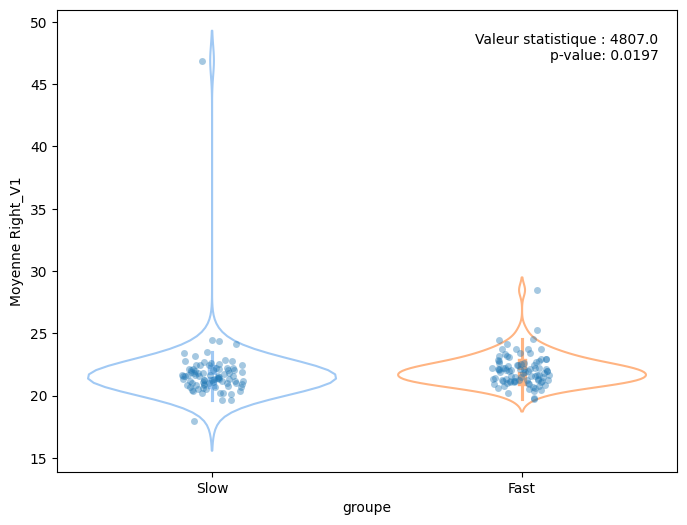

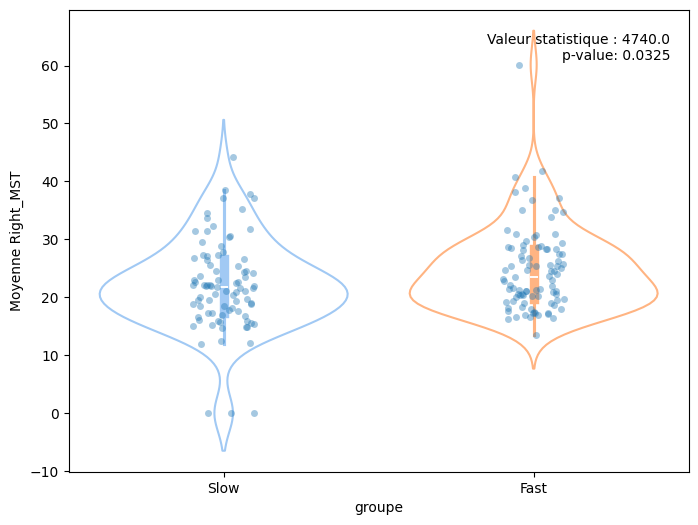

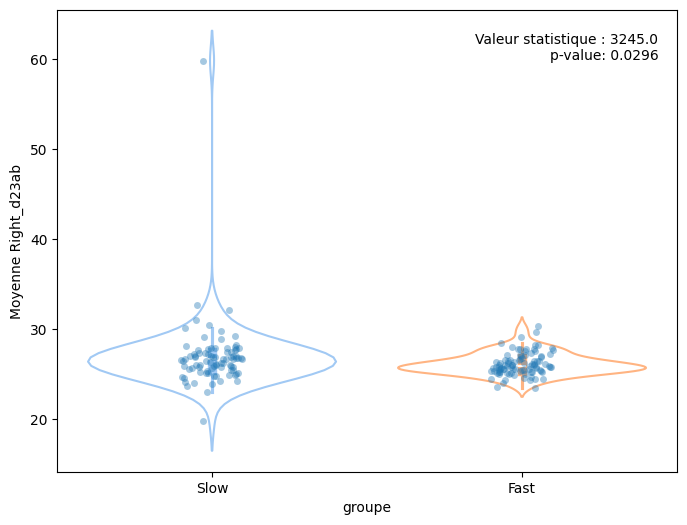

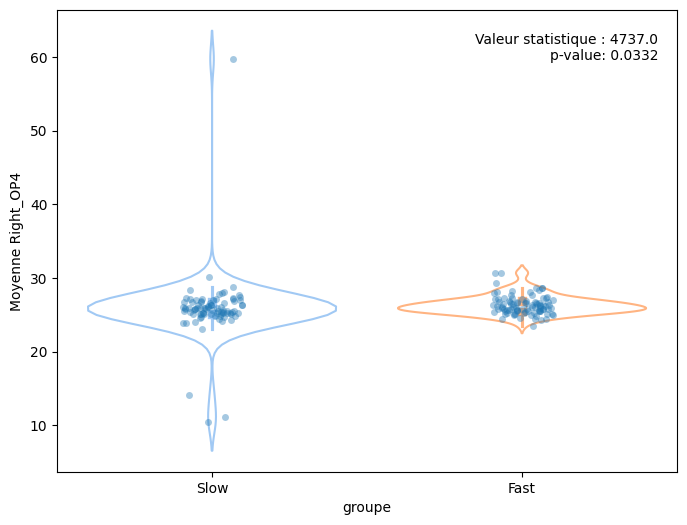

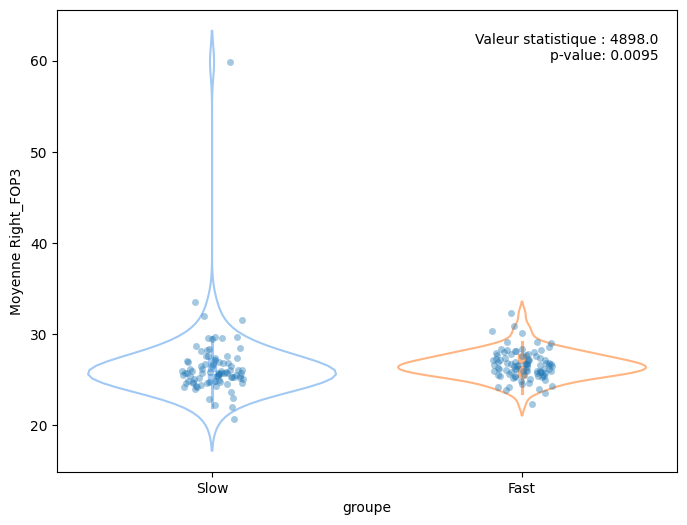

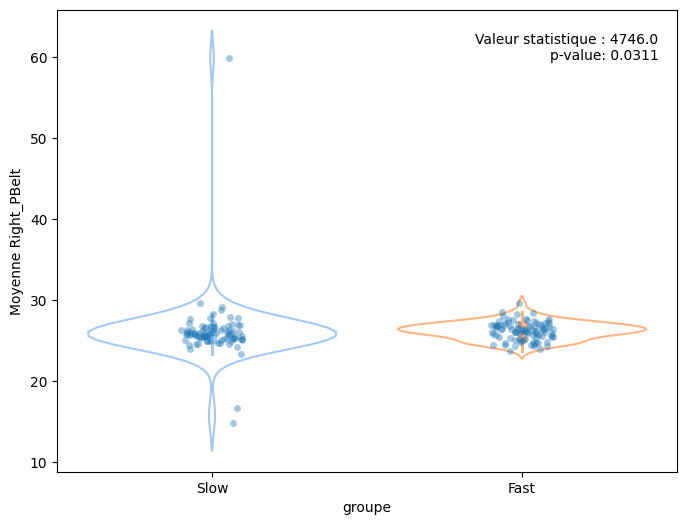

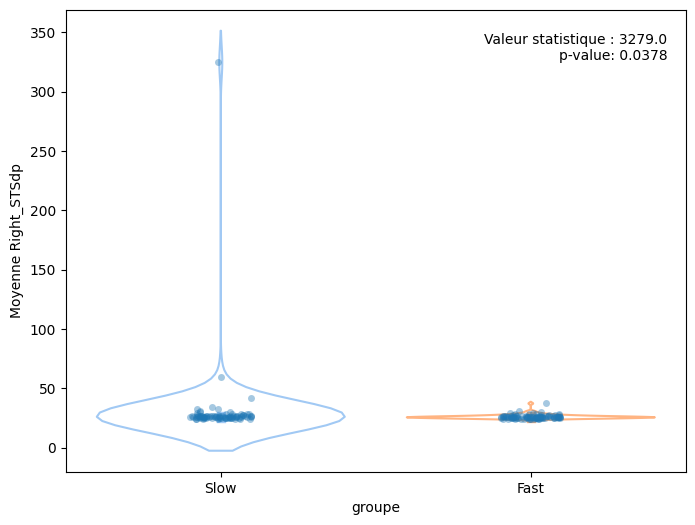

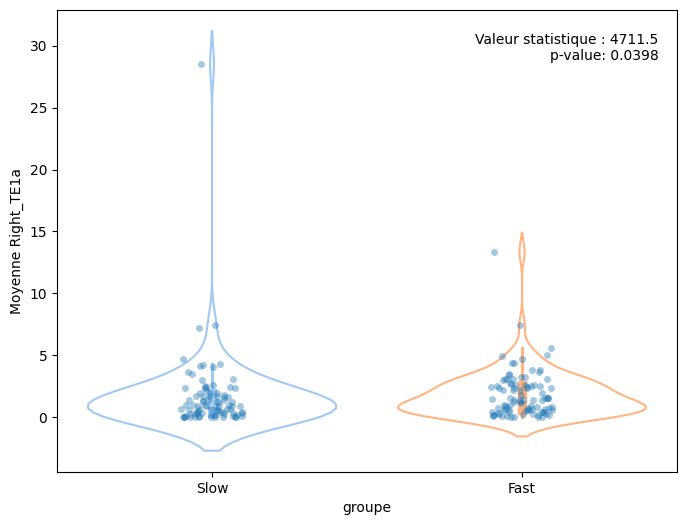

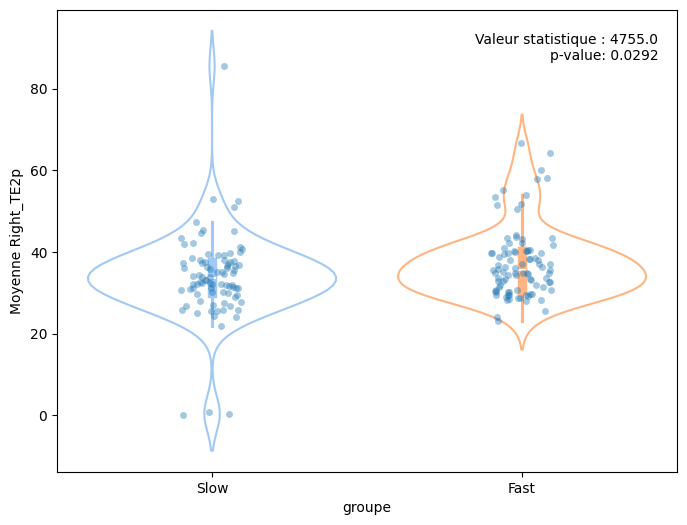

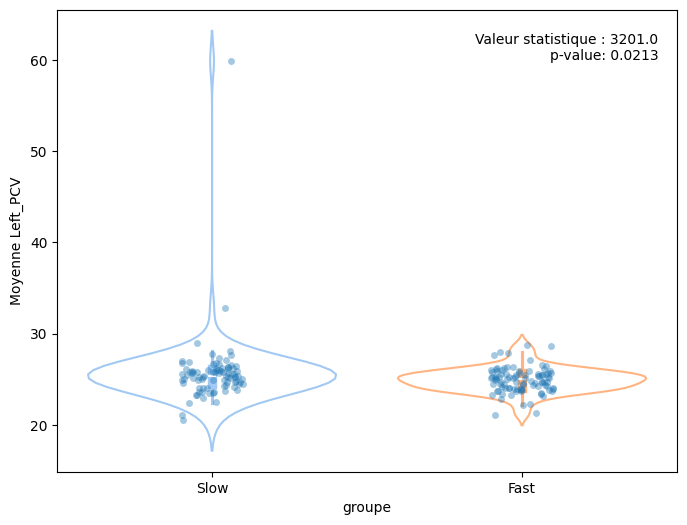

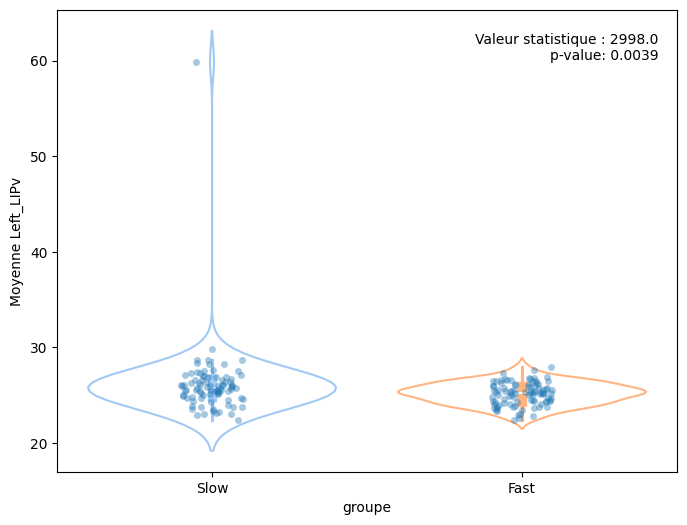

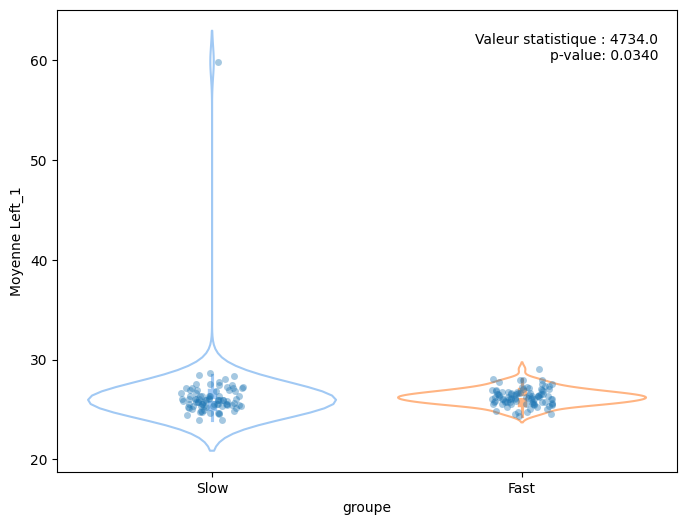

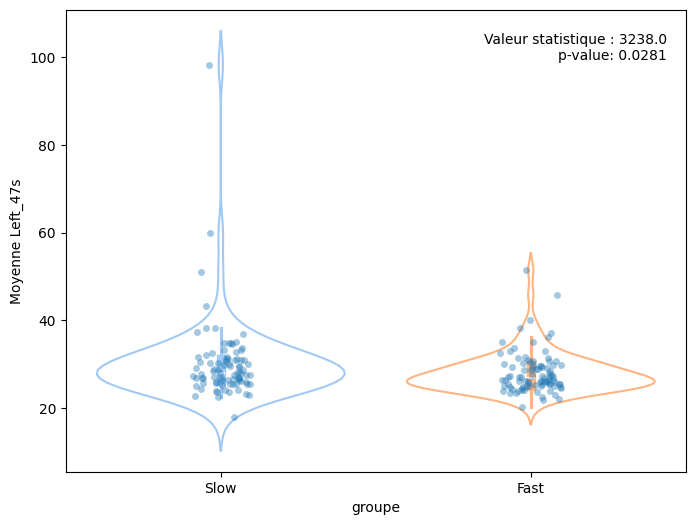

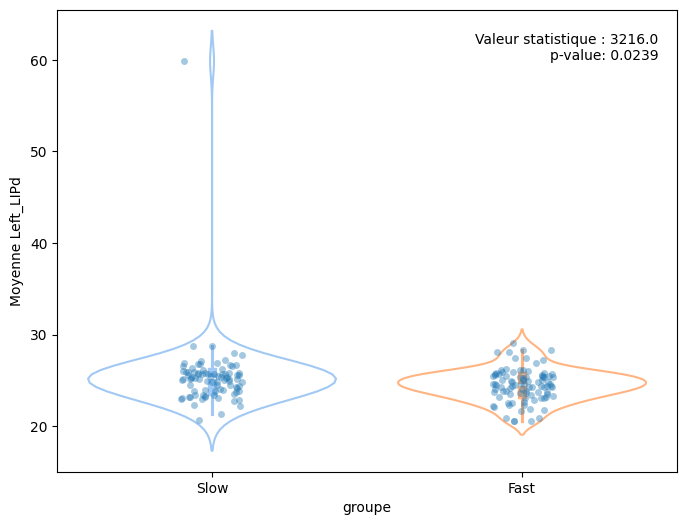

In [32]:
for i in df_glasser_slow_moyenne: 
    if i == "groupe" or i == "Unnamed: 0" or i == "SUBJID":
        continue
    data = pd.concat([df_glasser_slow_moyenne, df_glasser_fast_moyenne])

    stat,p_value = mannwhitneyu(df_glasser_fast_moyenne[i], df_glasser_slow_moyenne[i])
    
    if p_value < 0.05: 
        print(f"statistique du test de Mann-Whitney : {stat}")
        print(f"p-value : {p_value}")
        
        plt.figure(figsize=(8,6))
        
        plt.text(0.97, 0.95, f"Valeur statistique : {stat}\np-value: {p_value:.4f}", ha="right", va="top", transform=plt.gca().transAxes, fontsize = 10)
        
        test = sns.stripplot(x="groupe", y=i, data=data, jitter= True, alpha = 0.4)
        
        sns.violinplot(data=data, x="groupe", y=i, fill= False, palette="pastel")
        
        #plt.ylim(15,30)
        
        plt.savefig(f"/home/ishaq/Downloads/stripplot/Mann_Whitney_{i}.png")
    